# 21BCE5676 -KNN  algorithm implementation


# Objective -


The objective of this assignment is to explore a dataset containing features of bills and apply the K-Nearest Neighbors (KNN) algorithm for classification. The analysis begins with exploratory data analysis (EDA), by doing tasks such as data cleaning, summarization, and correlation analysis. Subsequently, the KNN algorithm is employed with varying values of K to classify bills as genuine or fake. Performance metrics including accuracy, precision, recall, and F1-score are evaluated for each K value to determine the optimal parameter. The confusion matrix is visualized to gain insights into the classifier's performance. 

# DATA DESCRIPTION

The dataset includes 1500 rows and 7 columns describing the features of a bill:

is_genuine: boolean

diagonal: float

height_left: float

height_right: float

margin_low: float

margin_upper: float

length: float

We need to predict if bill is geniune

# EXPLORATORY ANALYSIS


In [129]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df=pd.read_csv('fake_bills.csv',delimiter=';') #importing and saving the dataset
df.head(20) #showing starting 20 rows

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
5,True,172.17,103.74,104.08,4.42,2.95,112.81
6,True,172.34,104.18,103.85,4.58,3.26,112.81
7,True,171.88,103.76,104.08,3.98,2.92,113.08
8,True,172.47,103.92,103.67,4.00,3.25,112.85
9,True,172.47,104.07,104.02,4.04,3.25,113.45


In [130]:
df.shape #get the shape of dataframe created

(1500, 7)

In [131]:
df.dtypes #check the data types of each column in dataframe

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [132]:
df.isna().sum() #check the number of missing values in each column

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [133]:
#dropping null values
df=df.dropna();

In [134]:
#dropping null values as they are less in number
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [135]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000,1463.000000
mean,171.959193,104.031333,103.921476,4.485967,3.153083,112.674757
std,0.305457,0.299605,0.324181,0.663813,0.231466,0.873222
min,171.040000,103.140000,102.910000,2.980000,2.270000,109.490000
25%,171.750000,103.825000,103.710000,4.015000,2.990000,112.020000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.960000
75%,172.170000,104.230000,104.150000,4.870000,3.315000,113.340000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.320000


In [136]:
#getting the correlation matrix of dataframe
pcorr = df.corr()
pcorr

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.134720,-0.373624,-0.487177,-0.783032,-0.610412,0.850223
diagonal,0.134720,1.000000,0.018265,-0.019428,-0.111534,-0.059147,0.100758
height_left,-0.373624,0.018265,1.000000,0.235132,0.302643,0.243812,-0.314344
height_right,-0.487177,-0.019428,0.235132,1.000000,0.391085,0.306867,-0.404272
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.610412,-0.059147,0.243812,0.306867,0.431606,1.000000,-0.521139
length,0.850223,0.100758,-0.314344,-0.404272,-0.666753,-0.521139,1.000000


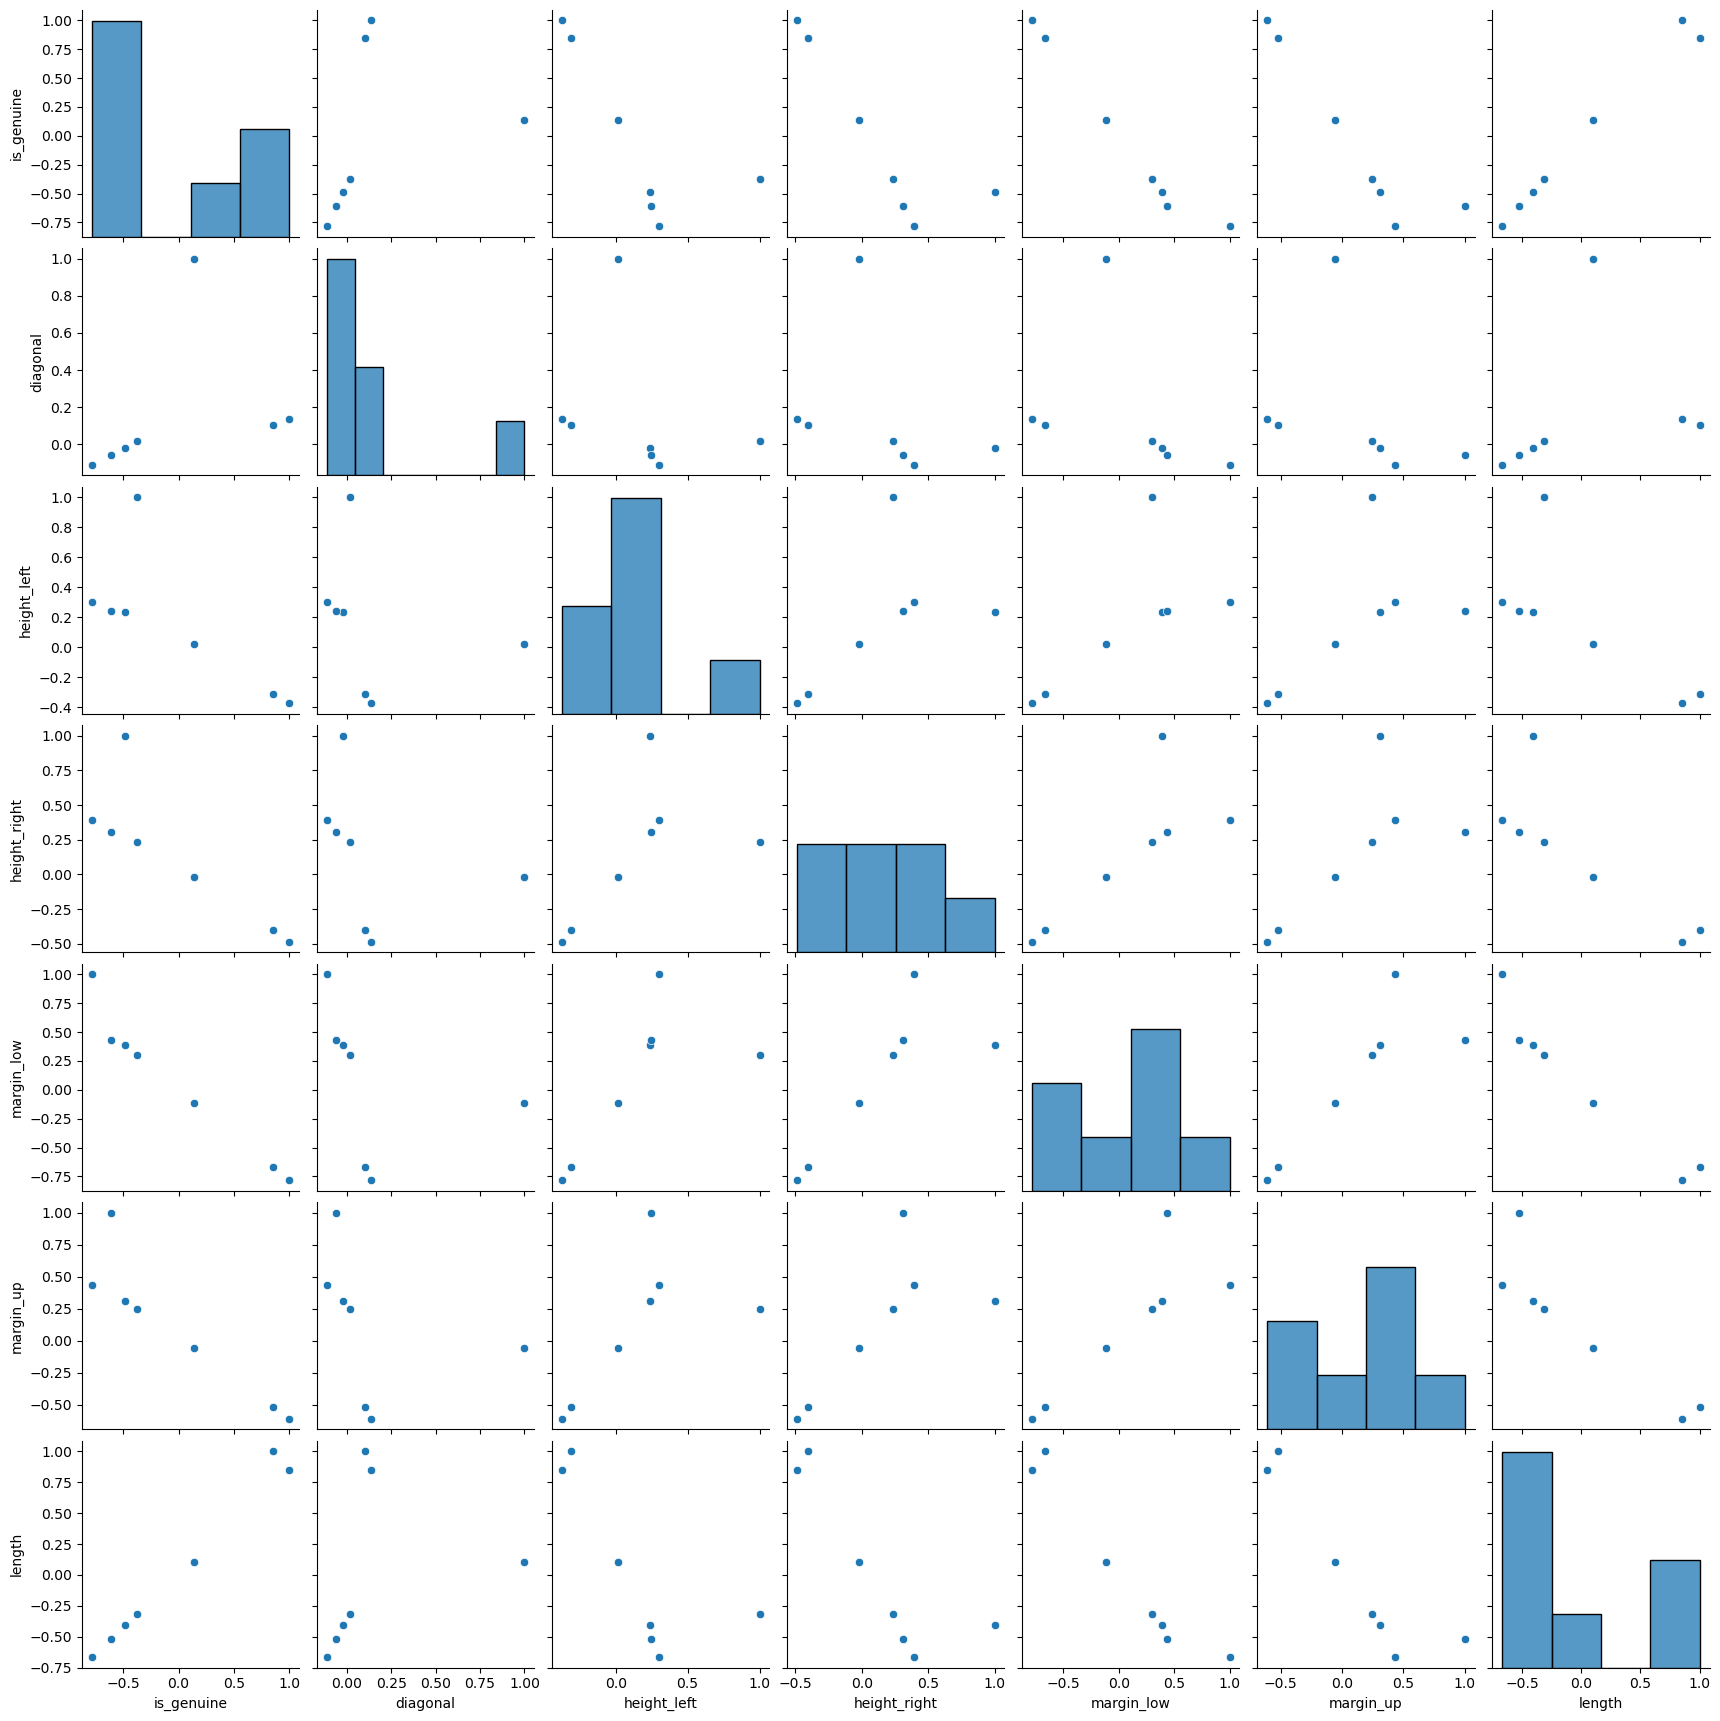

In [137]:
import seaborn as sns
sns.pairplot(pcorr)

<Axes: >

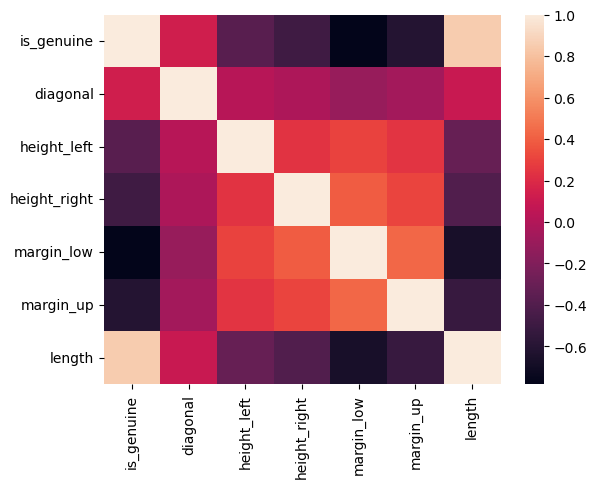

In [138]:
#representing the correlation in form of heat map
sns.heatmap(df.corr())

Hence we can infer that the following are independent variables:



diagonal:float

height_left: float

height_right: float

margin_low: float

margin_upper: float

length: float

These can be used to predict the dependent variable- is_geniune

# Methodology 

The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
The methodology used is:

1) For each example in the data

    Calculate the distance between the query example and the current example from the data and Add the distance and the index of the example to an ordered collection


2) Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances


3) Pick the first K entries from the sorted collection


4) Get the labels of the selected K entries


5) If regression, return the mean of the K labels


6) If classification, return the mode of the K labels

To choose the right value of K:
we run the KNN algorithm several times with different values of K and choose the K that reduces the number of errors we encounter while maintaining the algorithm’s ability to accurately make predictions when it’s given data it hasn’t seen before.

In [139]:
x = df.drop('is_genuine', axis=1).values  # Drop 'is_genuine' column and get values
y = df['is_genuine'].values

In [140]:
print(x.shape)
print(y.shape)

(1463, 6)
(1463,)


In [141]:
#Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 24)

In [142]:
# Trying with k=3
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [143]:
# Make predictions on the test data
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
y_pred3 = knn.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f1score3 = f1_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3 * 100:.2f}%")
print(f"Precision = {precision3 * 100:.2f}%")
print(f"Recall = {recall3* 100:.2f}%")
print(f"F1 Score = {f1score3 * 100:.2f}%")

Accuracy: 98.63%
Precision = 98.01%
Recall = 100.00%
F1 Score = 98.99%


In [144]:
# Instantiate simpleimputer and standardscaler to fill NaNs and scale the data.
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer()

In [145]:
# Fit and transform
x_train =imputer.fit_transform(x_train) 
x_test = imputer.transform(x_test) 

In [146]:
from sklearn.preprocessing import (FunctionTransformer, StandardScaler) 
scaler = StandardScaler()

In [147]:
# Fit and transform with the standardscaler
x_train_s =scaler.fit_transform(x_train) 
x_test_s = scaler.transform(x_test) 

In [148]:
# Trying with k=3 & imputer normalisation
from sklearn.neighbors import KNeighborsClassifier
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train_t, y_train)

KNeighborsClassifier(n_neighbors=3)

In [124]:
# Make predictions on the test data
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
y_pred3 = knn.predict(x_test)
accuracy3 = accuracy_score(y_test, y_pred3)
precision3 = precision_score(y_test, y_pred3)
recall3 = recall_score(y_test, y_pred3)
f1score3 = f1_score(y_test, y_pred3)
print(f"Accuracy: {accuracy3 * 100:.2f}%")
print(f"Precision = {precision3 * 100:.2f}%")
print(f"Recall = {recall3* 100:.2f}%")
print(f"F1 Score = {f1score3 * 100:.2f}%")

Accuracy: 98.63%
Precision = 98.01%
Recall = 100.00%
F1 Score = 98.99%


When training a kNN classifier, it's crucial to standardize the features. This is because kNN measures the distances between data points, using metrics like Euclidean Distance, which calculates the square root of the sum of squared differences between two points. In our dataset, some features have lower values, while others have much larger values. If we don't standardize the features, the calculation would be biased towards features with larger values, potentially leading to inaccurate predictions. To address this, we should standardize the data after splitting it into training and test sets. This approach prevents 'data leakage', ensuring that the model doesn't gain any extra information about the test set during normalization. __But in my of dataset, the features dont vary widely enough to have an imapct__

In [58]:
#Trying with 4
k = 4
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [59]:
y_pred4 = knn.predict(x_test)
accuracy4 = accuracy_score(y_test, y_pred4)
precision4 = precision_score(y_test, y_pred4)
recall4 = recall_score(y_test, y_pred4)
f1score4 = f1_score(y_test, y_pred4)
print(f"Accuracy: {accuracy4 * 100:.2f}%")
print(f"Precision = {precision4 * 100:.2f}%")
print(f"Recall = {recall4* 100:.2f}%")
print(f"F1 Score = {f1score4 * 100:.2f}%")

Accuracy: 98.63%
Precision = 98.01%
Recall = 100.00%
F1 Score = 98.99%


In [60]:
#Trying with 5
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred5 = knn.predict(x_test)
accuracy5 = accuracy_score(y_test, y_pred5)
precision5 = precision_score(y_test, y_pred5)
recall5 = recall_score(y_test, y_pred5)
f1score5 = f1_score(y_test, y_pred5)
print(f"Accuracy: {accuracy5 * 100:.2f}%")
print(f"Precision = {precision5 * 100:.2f}%")
print(f"Recall = {recall5* 100:.2f}%")
print(f"F1 Score = {f1score5 * 100:.2f}%")

Accuracy: 98.29%
Precision = 97.52%
Recall = 100.00%
F1 Score = 98.75%


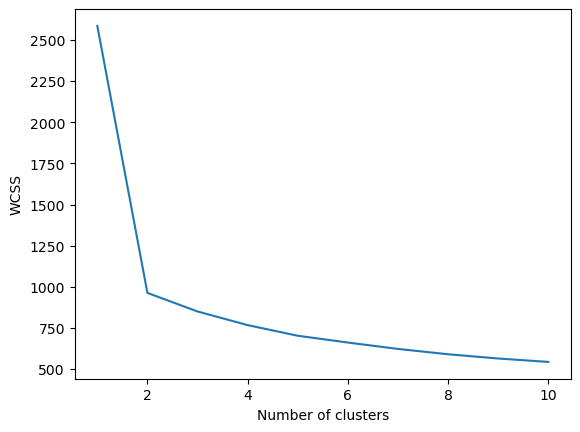

In [62]:
# plotting elbow curve
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df) 
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

 As we can observe the highest accuracy is at K=3. Therefore we will choose K=3 as our K value for most optimal prediction as suggested by the elbow curve.

# Result analysis


In [63]:
from sklearn.metrics import  classification_report, confusion_matrix

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
# Make predictions on the test set
y_pred = knn.predict(x_test)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98        96
        True       0.98      1.00      0.99       197

    accuracy                           0.99       293
   macro avg       0.99      0.98      0.98       293
weighted avg       0.99      0.99      0.99       293



This is a classification report generated from a my  model's performance on a dataset. Let's break down each metric:

1. Precision:
   - Precision measures the accuracy of the positive predictions made by the model. 
   - Precision for the "False" class is 1.00, indicating that when the model predicts a sample as "False," it is correct 100% of the time.
   - Precision for the "True" class is 0.98, meaning that when the model predicts a sample as "True," it is correct 98% of the time.

2. Recall:
   - Recall measures the proportion of actual positive samples that were correctly identified by the model.
   - Recall for the "False" class is 0.96, indicating that the model correctly identifies 96% of the actual "False" samples.
   - Recall for the "True" class is 1.00, meaning that the model correctly identifies all of the actual "True" samples.

3. F1-score:
   - The F1-score is the harmonic mean of precision and recall and provides a balance between them.
   - F1-score for the "False" class is 0.98, and for the "True" class is 0.99. 

4. Support:
   - Support refers to the number of actual occurrences of the class in the specified dataset.
   - There are 96 samples for the "False" class and 197 samples for the "True" class.

5. Accuracy:
   - Accuracy measures the overall correctness of the model across all classes.
   - The overall accuracy of the model is 99%, indicating that it correctly predicts the class for 99% of the samples.

6. Macro average:
   - The macro average calculates metrics independently for each class and then takes the unweighted mean of those metrics.
   - The macro average precision, recall, and F1-score are all around 0.99.

7. Weighted average:
   - The weighted average calculates metrics for each class, weighted by the number of true instances for each class, and then takes the average.
   - The weighted average precision, recall, and F1-score are all around 0.99, indicating a high overall performance of the model across both classes, with slightly more emphasis on the "True" class due to its higher support.

In [64]:
# Display confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[ 92   4]
 [  0 197]]


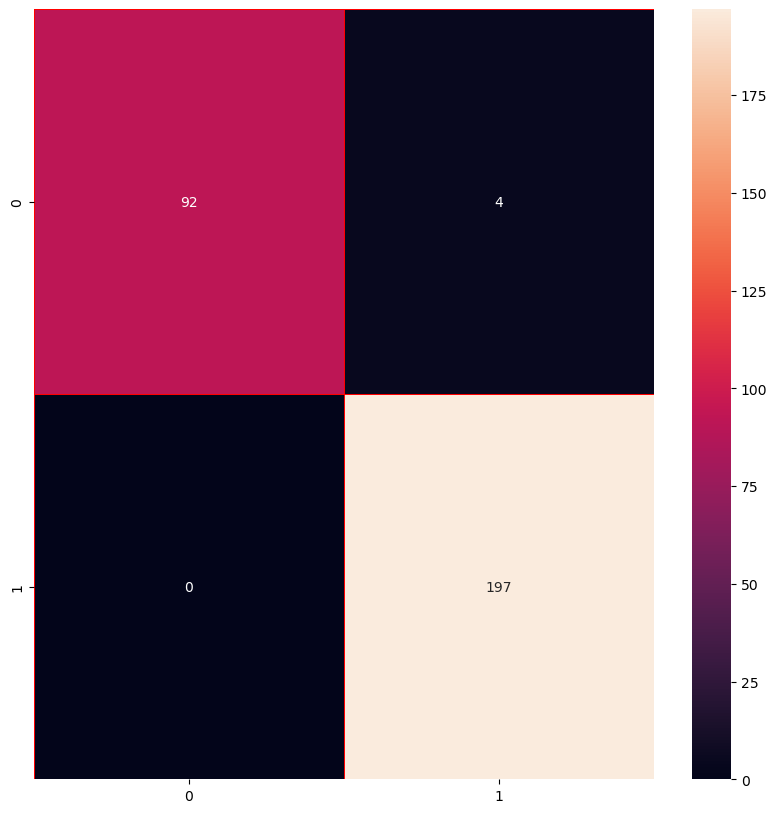

<Figure size 640x480 with 0 Axes>

In [65]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cm, annot=True, linewidths=0.5,linecolor="red", fmt= '.0f',ax=ax)
plt.show()
plt.savefig('ConfusionMatrix.png')

True Positives (TP): The number of genuine bills that were correctly classified as genuine->197

False Positives (FP): The number of non-genuine bills that were incorrectly classified as genuine->4

True Negatives (TN): The number of non-genuine bills that were correctly classified as non-genuine->92

False Negatives (FN): The number of genuine bills that were incorrectly classified as non-genuine->0

From the confusion matrix:

The model correctly identified 197 genuine bills (True Positives).

The model misclassified 4 non-genuine bills as genuine (False Positives).

The model correctly identified 92 non-genuine bills (True Negatives).

There were no genuine bills misclassified as non-genuine (False Negatives).

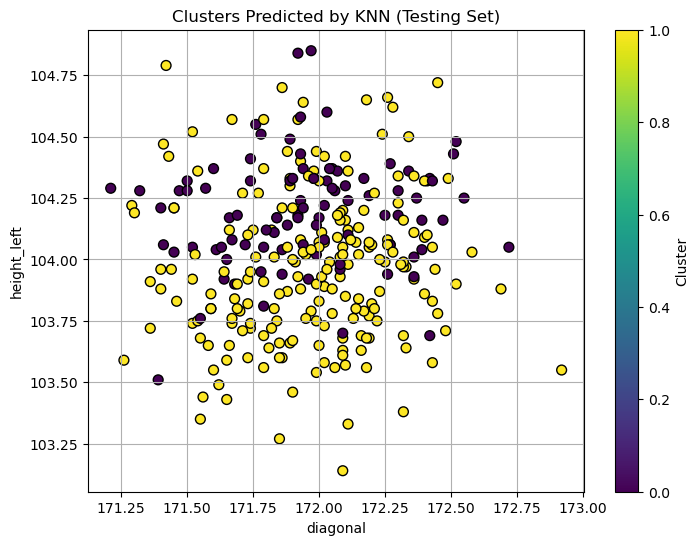

In [80]:
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_pred, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('diagonal')  # Replace 'Feature 1' with the name of your first feature
plt.ylabel('height_left')  # Replace 'Feature 2' with the name of your second feature
plt.title('Clusters Predicted by KNN (Testing Set)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


# Conclusion



In [81]:
from tabulate import tabulate
data = [
    ["Metric", "K=3", "K=4","K=5"],
    ["Accuracy", "{0:0.4f}".format(accuracy3), "{0:0.4f}".format(accuracy4), "{0:0.4f}".format(accuracy5)],
    ["Precision", "{0:0.4f}".format(precision3), "{0:0.4f}".format(precision4), "{0:0.4f}".format(precision5)],
    ["Recall", "{0:0.4f}".format(recall3), "{0:0.4f}".format(recall4), "{0:0.4f}".format(recall5)],
    ["F1 Score", "{0:0.4f}".format(f1score3), "{0:0.4f}".format(f1score4), "{0:0.4f}".format(f1score5)],
]

print(tabulate(data, headers="firstrow", tablefmt="grid"))

+-----------+--------+--------+--------+
| Metric    |    K=3 |    K=4 |    K=5 |
+===========+========+========+========+
| Accuracy  | 0.9863 | 0.9863 | 0.9829 |
+-----------+--------+--------+--------+
| Precision | 0.9801 | 0.9801 | 0.9752 |
+-----------+--------+--------+--------+
| Recall    | 1      | 1      | 1      |
+-----------+--------+--------+--------+
| F1 Score  | 0.9899 | 0.9899 | 0.9875 |
+-----------+--------+--------+--------+


# Refernces

https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

https://www.kaggle.com/datasets/alexandrepetit881234/fake-bills

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn